# Gene-Expression Differences in Peripheral Blood Between Lithium Responders and non-Responders in the Lithium Treatment-Moderate Dose Use Study

## Secção 2 - Redução de Dimensionalidade e Clustering de Dados

Importar bibliotecas:

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectPercentile, f_classif

from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

Para assegurar a validade e interpretabilidade dos resultados obtidos pela aplicação de algoritmos de redução de dimensionalidade e de clustering de dados, e devido à sensibilidade destes algoritmos, é essencial trabalhar com conjuntos de dados normalizados.

Posto isto, é necessário carregar os dados resultantes da Secção 1:

In [2]:
# Carregar dados:

data = pd.read_csv("dados.csv", sep=',', index_col = 0)
meta = pd.read_csv("meta_dados.csv", sep=',', index_col = 0)

## Filtração de Dados

### Filtrar Dados por Variância

Procura-se identificar todas as colunas de dados, ou seja, todos os genes que apresentam alta variabilidade, segundo o valor de threshold considerado.

In [3]:
# Filtração por variância para um threshold de 10%
variance = VarianceThreshold(threshold=0.1)
x_variance = variance.fit_transform(data)

variance_columns = data.columns[variance.get_support()]
data_variance = data[variance_columns]
print("Features com maior variância:\n", data_variance.shape)
data_variance.head()

Features com maior variância:
 (120, 4389)


,ILMN_1651228,ILMN_1651347,ILMN_1651373,ILMN_1651385,ILMN_1651429,ILMN_1651433,ILMN_1651438,ILMN_1651496,ILMN_1651499,ILMN_1651705,...,ILMN_3307827,ILMN_3307868,ILMN_3307930,ILMN_3308138,ILMN_3308936,ILMN_3308961,ILMN_3309349,ILMN_3309453,ILMN_3310491,ILMN_3311190
GSM1105438,11.9813,10.32320,6.89822,8.97053,7.53639,8.61018,8.24999,9.24908,8.19963,11.4110,...,9.59938,9.37796,10.8636,8.15350,9.79701,8.05426,8.21090,7.25379,11.0686,7.81762
GSM1105486,12.9543,10.22550,6.73158,8.51541,8.19142,8.16454,8.82625,8.98784,8.23221,11.1586,...,9.41552,9.72430,10.9938,7.50460,8.98432,7.42261,8.77338,7.01544,10.8194,7.55871
GSM1105487,12.9664,9.53867,6.67076,9.15560,8.99513,7.74098,9.33438,8.54113,8.89842,10.1865,...,10.48430,7.66534,10.7682,8.73582,8.71478,9.36390,8.66552,7.77160,12.4403,7.69129
GSM1105490,13.4400,10.59150,6.75609,8.78092,8.12708,8.48978,9.11659,8.55447,8.23015,11.6976,...,10.16540,8.51338,11.0435,7.35410,9.36300,7.76960,9.13891,7.02352,11.1825,7.32495
GSM1105491,12.9282,9.89505,7.26238,9.14688,8.20682,7.72246,8.70072,8.99047,8.33663,11.2626,...,10.11270,9.37231,10.4265,7.63630,9.53227,8.35445,7.13069,7.14064,12.5022,7.90085


### Filtrar Dados por Percentil

Seleção de dados com base na classificação de ANOVA, para identificar todas as colunas, isto é, todos os genes com um percentil mínimo de 25.

In [18]:
selector = SelectPercentile(f_classif, percentile=25)
labels = data.iloc[:,0]
x_percentile = selector.fit_transform(data.iloc[:,1:], labels)

columns_percentile = data[selector.get_feature_names_out()]
data_percentile = pd.DataFrame(data=x_percentile, index=data.index, columns=columns_percentile.columns)
print("Features com percentil 25:\n", data_percentile.shape)
data_percentile.head()

Features com percentil 25:
 (120, 11831)


,ILMN_1651229,ILMN_1651235,ILMN_1651237,ILMN_1651278,ILMN_1651329,ILMN_1651330,ILMN_1651339,ILMN_1651347,ILMN_1651351,ILMN_1651358,...,ILMN_3310925,ILMN_3310935,ILMN_3311005,ILMN_3311010,ILMN_3311100,ILMN_3311135,ILMN_3311140,ILMN_3311170,ILMN_3311175,ILMN_3311180
GSM1105438,7.94897,6.84083,6.67746,8.13267,6.95606,6.55813,6.87323,10.32320,6.78123,6.68912,...,7.01181,6.73890,7.00779,6.81024,6.84367,6.84189,6.65665,6.77274,6.85770,7.08213
GSM1105486,7.86514,6.90360,6.96924,8.32905,6.88453,6.58045,6.84578,10.22550,6.68985,6.72440,...,6.81231,6.88561,7.02933,6.81614,6.89522,6.84664,6.89849,6.78293,6.81344,6.85598
GSM1105487,8.50659,6.83799,6.74935,7.90606,6.81956,6.73977,6.86671,9.53867,6.77842,6.63179,...,6.85348,6.83455,6.84190,6.65386,6.95222,6.73200,6.69384,6.73403,6.69688,6.96195
GSM1105490,7.85840,6.79428,6.82034,8.41232,6.87126,6.56288,6.84748,10.59150,6.73818,6.65293,...,6.74182,6.79763,6.98149,6.80461,6.78327,7.02354,6.83174,6.85946,6.69968,6.99962
GSM1105491,7.71051,6.81236,6.75114,7.94832,7.15862,6.64993,7.03876,9.89505,6.90479,6.74497,...,6.89499,6.71579,6.77617,6.95283,6.81712,6.96421,6.68994,6.87367,6.68000,6.88795


## Pre-processamento de Dados

Uma vez que a aplicação de filtros sucessivos não é aconselhada, pois terá como consequência a distorção excessiva dos dados, de tal modo a estes já não representaram adequadamente o caso a analisar, e, ainda, o risco de overfitting dos modelos posteriormente, opta-se por aplicar a filtração de dados pela sua baixa variância.

Isto porque, a filtração por variância mostra ser mais eficaz na identificação e remoção de features que apresentam variação mínimas nos dados, o que é de elevado interesse nas análises que visam destacar características mais informativas dos dados, como é o caso das técnicas de redução de dimensionalidade que se seguem.

Assim, é guardado um novo ficheiro, composto pelos dados filtrados por variância, para facilitar o seu uso nas restantes etapas do trabalho.

In [4]:
data_variance.to_csv("data_variance.csv")

Quanto à etapa de preprocessamento de dados garante que as comparaçãoes entre variáveis são válidas, previne que certos algoritmos sejam dominados por features de grande escala, e, ainda, facilita a convergência durante os processos de clustering.

In [46]:
print("Dados")
pre_data = preprocessing.scale(data_variance.values)
print("Media: ", data_variance.mean())
print("Desvio padrao: ", data_variance.std())
dados = pd.DataFrame(pre_data)

Dados
Media:  ILMN_1651228    12.896132
ILMN_1651347     9.993790
ILMN_1651373     7.117772
ILMN_1651385     9.055488
ILMN_1651429     8.241857
                  ...    
ILMN_3308961     8.241161
ILMN_3309349     8.481491
ILMN_3309453     7.236510
ILMN_3310491    11.944914
ILMN_3311190     7.765341
Length: 4389, dtype: float64
Desvio padrao:  ILMN_1651228    0.391218
ILMN_1651347    0.401267
ILMN_1651373    0.538904
ILMN_1651385    0.427771
ILMN_1651429    0.388762
                  ...   
ILMN_3308961    0.632860
ILMN_3309349    0.692887
ILMN_3309453    0.361517
ILMN_3310491    0.597303
ILMN_3311190    0.334960
Length: 4389, dtype: float64


## Redução de Dimensionalidade

A redução de dimensionalidade é crucial para a aplicação de modelos de Aprendizagem Automática. 

Quando a trabalhar com datasets de grandes dimensões, são necessários vastos recursos computacionais para treinar modelos de aprendizagem máquina, pelo que, a redução de número de features pode melhorar significativamente o desempenho dos modelos, tornando-os mais adequados para aplicações práticas. 

Ainda, é importante reconhecer o risco de overfitting de modelos de aprendizagem automática quando se trabalha com demasiadas features. Este fenómeno ocorre quando o modelo demonstra uma boa performance com dados de treino, mas, fracassa quando deparado com dados nunca antes vistos. Deste modo, reduzir a dimensão e complexidade do modelo permite um maior foco nas features mais informativas. 

Relativamente à visualização do modelo e a sua interpretabilidade, estas são facilitadas pela redução de dimensionalidade, uma vez que a projeção dos dados em espaços de menor dimensão irá possibilitar uma mais fácil identificação de padrões e relações entre features do modelo e as previsões do mesmo.

Com isto, procura-se através da redução de dimensionalidade encontrar o menor conjunto de variáveis capazes de descrever o máximo da variabilidade dos dados, reduzindo, então, a quantidade de dados necessários a avaliar.

### PCA

A Análise de Componente Principais (PCA) é uma técnica de redução de dimensionalidade, cujo objetivo visa a transformação de um dataset extenso e complexo num novo sistema de coordenadas (componentes principais), atendendo a que a variância dos dados é maximizada. O PCA assume relações lineares entre features, o que lhe confere também a capacidade de estabelecer combinações de features através destas relações, de tal modo a representar os dados de forma mais informativa. 

Assim sendo, a aplicação da técnica de PCA captura as informações (features) de maior relevância à medida que reduz a dimensão dos dados. Com isto, consegue-se uma representação de dados computacionalmente mais eficientes e proporciona-se uma visualização facilitada dos dados de elevada dimensão para uma melhor análise e interpretação.

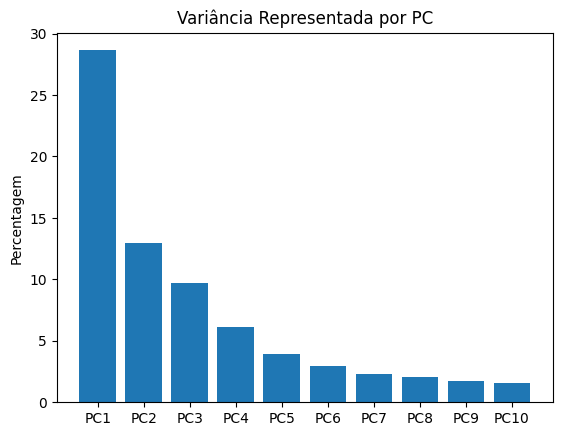

In [23]:
n = 10
pca = PCA(n_components=n)
pca.fit(dados)
x_pca = pca.transform(dados)

plt.bar(range(n), pca.explained_variance_ratio_*100)
plt.xticks(range(n), ['PC'+str(i) for i in range(1,n+1)])
plt.title("Variância Representada por PC")
plt.ylabel("Percentagem")
plt.show()

Através do gráfico resultante da análise PCA, entende-se que as features apresentam baixa capacidade de representar a variância dos dados, uma vez que tem-se um máximo de representação de variância de 25 a 30%, o que indica a necessidade de avaliar um conjunto mais extenso de PCs para representar corretamente os dados do caso.

In [24]:
# Identificar quantidade de PCs necessários para representar pelo menos 80% de variância dos dados

pca_80 = PCA(n_components=0.8)
pca_80.fit(dados)
x_reduced = pca_80.transform(dados)
total_pcs = x_reduced.shape[1]

print('São necessários', total_pcs, 'PCs para representar pelo menos 80% da variância dos dados.')


São necessários 19 PCs para representar pelo menos 80% da variância dos dados.


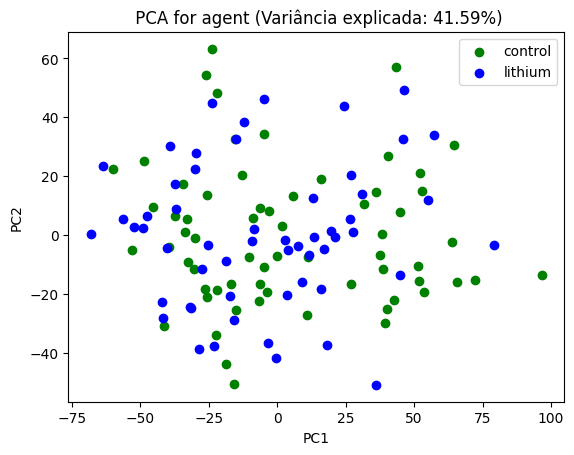

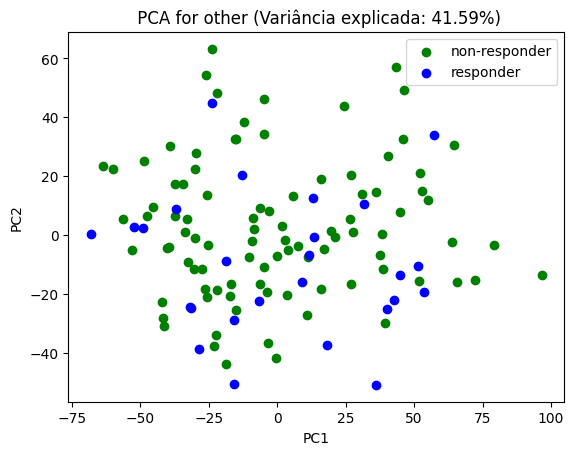

In [25]:
# Visualização por Scores Plot de coordenadas de PC1 e PC2

n_components = 2
explained_variance = pca.explained_variance_ratio_[:n_components].sum()
for class_name in ['agent','other']:
    output_data = meta[class_name].values
    plt.figure()
    for c, name in zip("gb", meta[class_name].unique()):
        plt.scatter(x_pca[output_data == name, 0], x_pca[output_data == name, 1], c=c, label=name)
    plt.legend()
    plt.title(' PCA for '+ class_name + ' (Variância explicada: {:.2f}%)'.format(explained_variance*100))
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.show()


Analisando a representação gráfica das coordenadas de PC1 e PC2, os PCs que apresentam uma maior representação da variância dos dados, não é possível distinguir agrupamentos naturais dos dados. Esta análise não proporciona indicações quanto à relação quer entre a expressão genética e o tipo de tratamento recebido, quer entre a expressão genética e a respota biológica, ou seja, se o paciente é classificado como responder ou non-responder.

Novamente, destaca-se que, apesar de o PC1 e PC2 conseguirem representar uma boa parte da variância dos dados (cerca de 42%), é ainda importante considerar mais PCs para uma melhor representação dos dados. De tal forma, não é aconcelhado qualquer redução de dimensionalidade adicional.

### t-SNE

Uma outra técnica de redução de dimensionalidade utilizada em aprendizagem máquina é a t-distributed Stochastic Neighbor Embedding (t-SNE). 

Esta técnica não-linear, também conhecida como "manifold learning", é particularmente efetiva na identificação de relações não-lineares complexas em dados de grandes dimensões, e, ainda, na visualização de clusters de dados, tanto em 2D como 3D. 

Para tal, baseia-se na preservação de distâncias em pares de pontos, com recurso a funções objetivo distintas. Assim, pela distribuição probabilística sobre pares de objetos, atribui-se uma maior probabilidade a objetos mais similares.

In [26]:
tsne = TSNE(n_components=2, n_iter=10000)
tsne_results = tsne.fit_transform(dados)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/threadpoolctl.py:1019: RuntimeWarning: libc not found. The ctypes module in Python 3.9 is maybe too old for this OS.
  warnings.warn(


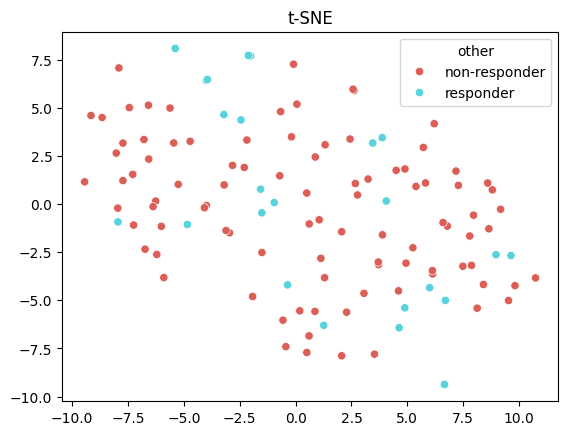

In [27]:
# Representação dos resultados por Scatterplot

fig = sns.scatterplot(
    x=tsne_results[:,0], y=tsne_results[:,1],
    hue="other",
    palette=sns.color_palette("hls", 2),
    data=meta,
    legend="full",
).set(title="t-SNE")

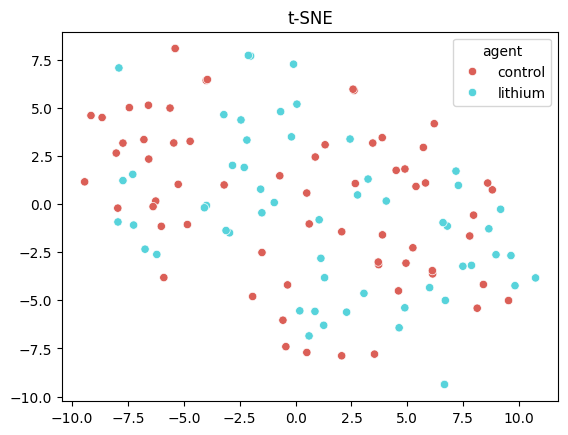

In [28]:
fig = sns.scatterplot(
    x=tsne_results[:,0], y=tsne_results[:,1],
    hue="agent",
    palette=sns.color_palette("hls", 2),
    data=meta,
    legend="full",
).set(title="t-SNE")

Deste modo, não é possível com a representação dos resultados da t-SNE visualizar clusters naturais de dados, nem distinguir relações não-lineares complexas entre os dados, quer pela classificação de resposta, quer pelo tipo de tratamento

## Clustering de Dados

Com o intuito de procurar grupos naturais nos dados, e padrões de estruturas e de comportamentos, de modo a extrair melhores interpretações dos datasets complexos, aplicam-se frequentemente algoritmos de clustering de dados.

Assim, o clustering de dados é um método de aprendizagem não-supervisionada, em que o algoritmo agrupa ocorrências de dados semelhantes, de modo a simplificar a análise dos dados, reduzindo a sua dimensionalidade, e, ainda, permitir que sejam identificados padrões nos dados de forma autónoma. Tem-se também uma outra aplicação vantajosa associada ao clustering de dados - a identificação de anomalias e outliers nos dados.

No caso específico de investigação biológica com dados genómicos, como é o caso do estudo a analisar, os algoritmos de clustering, ao agrupar genes com funções semelhantes, proporcionam uma melhor compreensão da relação entre expressão genética e reposta biológica.

### Clustering Hierárquico

O Clustering Hierárquico é um método de análise de clusters baseado na elaboração de uma hierarquia de clusters, formada por iterações sucessivas que agrupam objetos similares. 

No caso de clustering hierárquico pela abordagem aglomerativa, mais especificamente, por métodos de linkage, a fusão de clusters é definida pela distância entre os mesmos. Depois de calculadas as distâncias entre clusters, ou seja, a dissimilaridade, os clusters com menor distância são fundidos num novo cluster, e a matriz de distância é novamente calculada.

Desta forma, com a representação visual da hierarquia de clusters por uma estrutra de árvore - um dendograma - tornam-se mais percetíveis as relações entre os dados.

Após testados os diferentes métodos de linkage, apresentam-se os métodos que produziram melhores resultados:

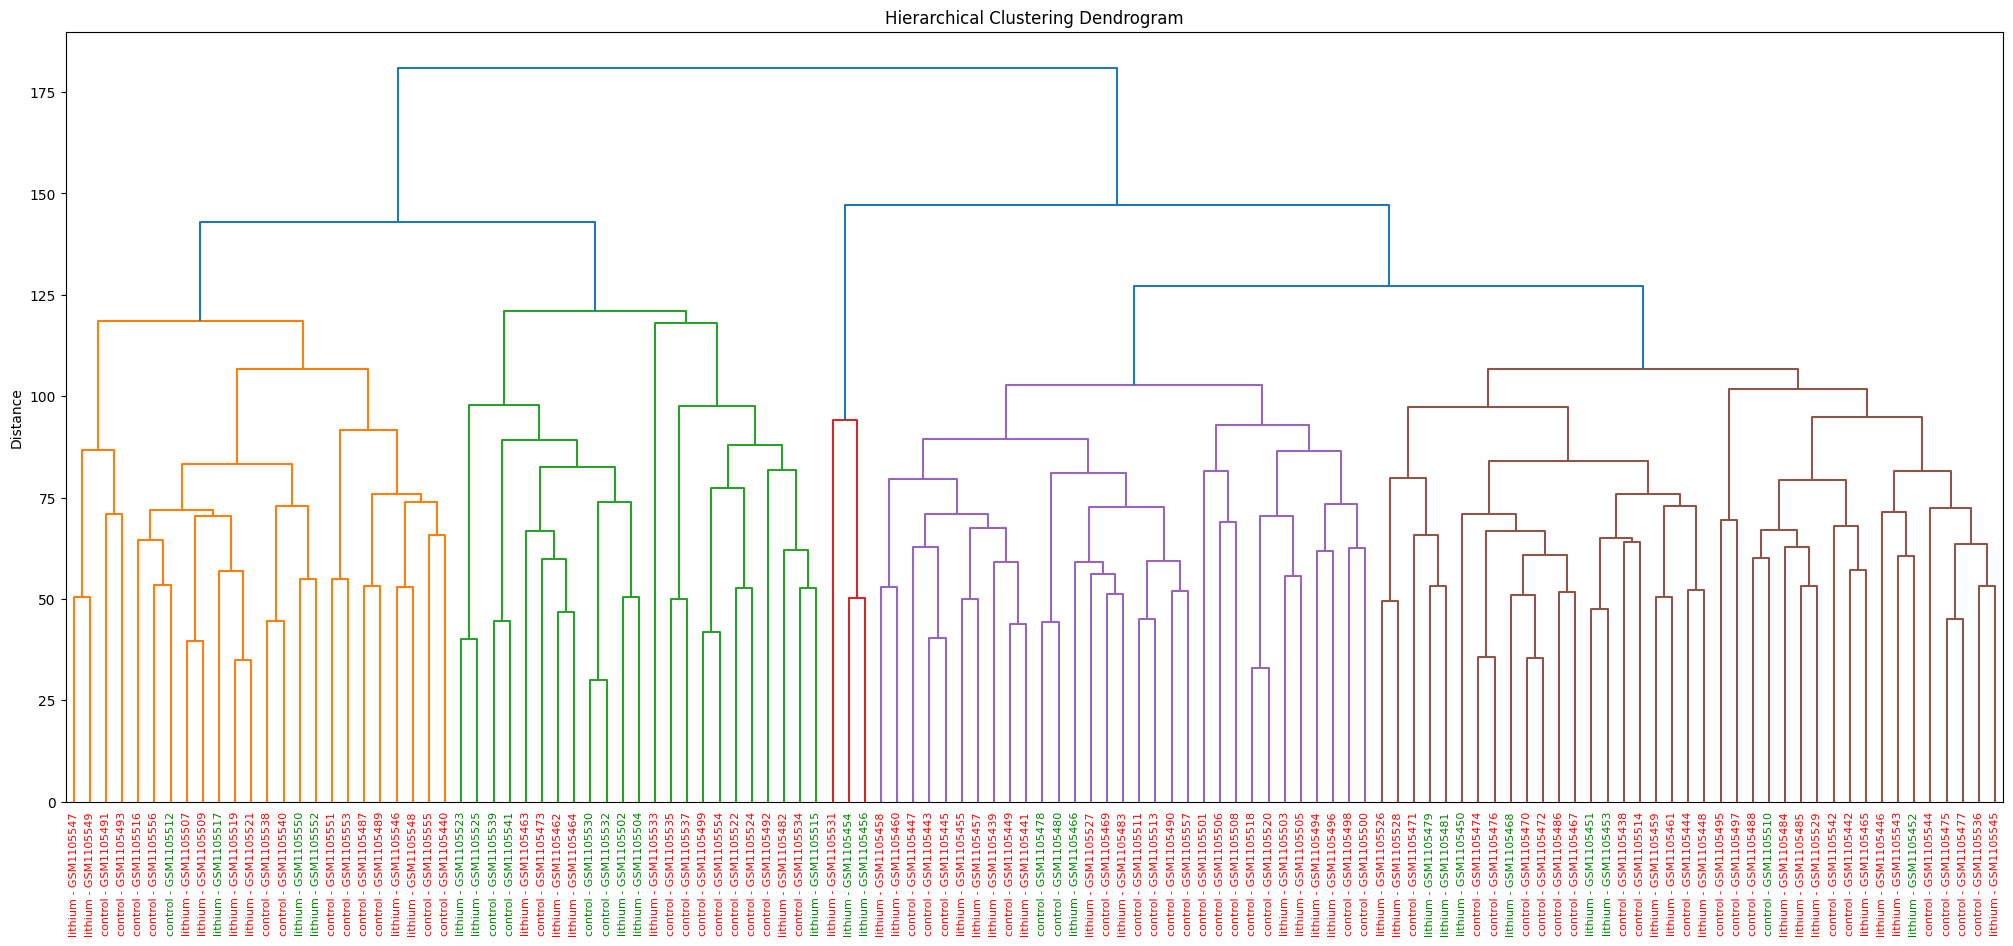

In [49]:
Z = linkage(dados, method="complete")

plt.figure(figsize=(25, 10))
dendrogram(
    Z,
    labels = [f"{ind} - {sample}" for sample, ind in zip(meta.index.values, meta['agent'].values)],
    leaf_rotation=90.,  
    leaf_font_size=8.,  
)

plt.title('Hierarchical Clustering Dendrogram')
plt.ylabel('Distance')

label_colors = {'non-responder': 'r', 'responder': 'g'}
ax = plt.gca()
xlbls = ax.get_xmajorticklabels()
for lbl in xlbls:
    label = lbl.get_text().split(" - ")[1]
    color = label_colors[meta.loc[label, 'other']]
    lbl.set_color(color)
plt.show()

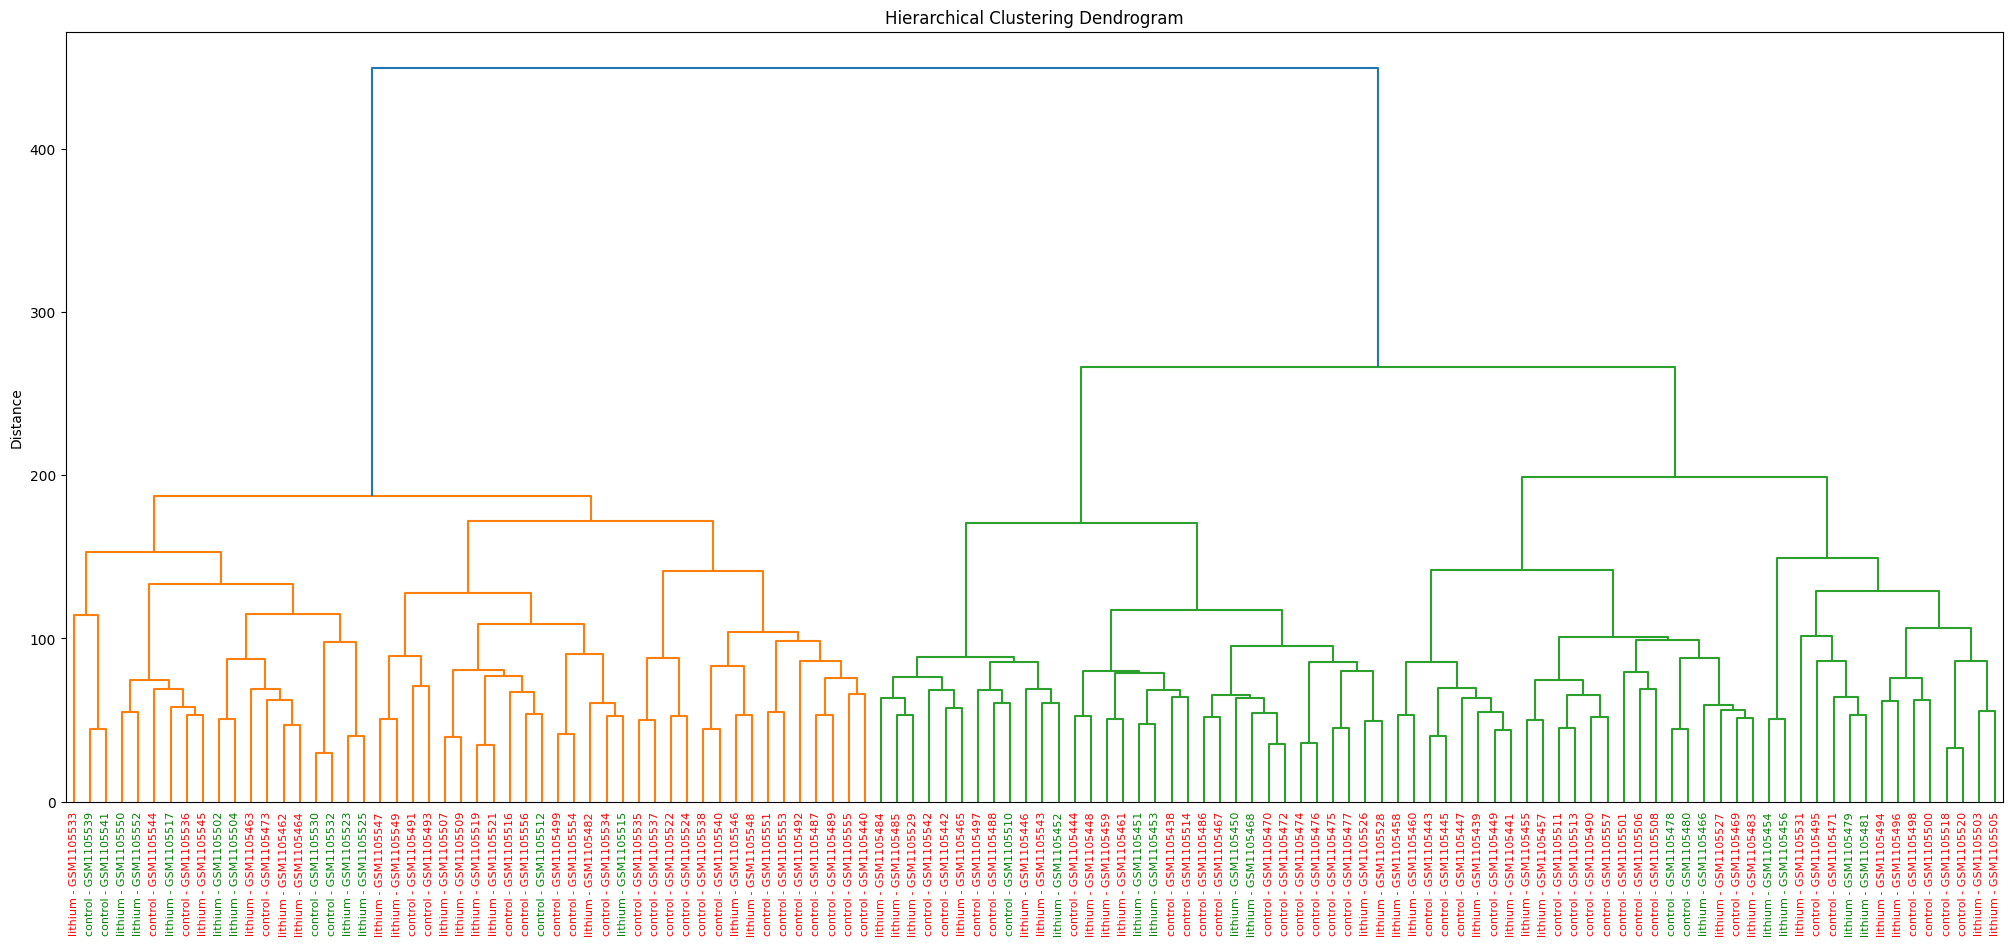

In [30]:
Z = linkage(dados, method="ward")

plt.figure(figsize=(25, 10))
dendrogram(
    Z,
    labels = [f"{ind} - {sample}" for sample, ind in zip(meta.index.values, meta['agent'].values)],
    leaf_rotation=90.,  
    leaf_font_size=8.,  
)

plt.title('Hierarchical Clustering Dendrogram')
plt.ylabel('Distance')

label_colors = {'non-responder': 'r', 'responder': 'g'}
ax = plt.gca()
xlbls = ax.get_xmajorticklabels()
for lbl in xlbls:
    label = lbl.get_text().split(" - ")[1]
    color = label_colors[meta.loc[label, 'other']]
    lbl.set_color(color)
plt.show()

Relativamente ao dendograma resultante do clustering hierarquico efetuado pelo método de linkage completo, este demonstra a existênia de 5 grupos principais nas amostras recolhidas em diferentes tratamentos, sendo que, em cada grupo, os valores relativos à expressão genética de cada amostra se encontram mais próximos entre si. No caso do clustering hierarquico pelo método de Ward, verifica-se uma situação semelhante mas com a formação de menos grupos, pois apenas se consegue distinguir 2 agrupamentos principais. Posto isto, atendendo ao objetivo inicial de desenvoler modelos capazes de prever a classificação de pacientes ('responder' ou 'non-responder') para diferentes tratamentos, conclui-se que o método mais indicado para o clustering hierárquico é o método de Ward.

Contudo, em ambos os casos expostos, os resultados dos clusterings hierarquicos mostram incidências de overlapping de dados, isto é, ocorrências tanto de 'responders' como de 'non-responders' em cada grupo diferenciado. Tal implica que as conclusões a retirar são limitadas, uma vez que não é viável estabelecer uma relação entre a expressão genética induzida por um dado tratamento e o seu posterior efeito enquanto estímulo de resposta ou não-resposta ao tratamento.

### Clustering por k-Means

O clustering por k-Means é um algoritmo de aprendizagem não-supervisionada aplicado para a partição dos dados em k clusters distintos, ao agrupar dados com a intenção de minimizar as distâncias entre os pontos e os centróides dos clusters. Posto isto, a função objetivo do clutsering por k-Means beneficia clusters homogéneos, isto é, clusters com concentrações de pontos próximos do centróide.

Este tipo de clustering dá-se por concluído quando se atinge convergência - quando o centróide não altera significativamente entre iterações, ou quando é atingido o número especificado de iterações limite.

Por fim, obtem-se uma solução na qual cada ponto encontra-se atribuído a um dos k clusters, e os centróides representam o centro de cada cluster. Com isto, tem-se uma interpretação clara e direta do agrupamento de dados. 

In [42]:
k = 2
kmeans = KMeans(n_clusters=k, max_iter=1000, n_init=10)
kmeans.fit(dados)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

pd.crosstab(labels, meta['agent'], rownames=['clusters'] )

agent,control,lithium
clusters,,
0,38,33
1,26,23


Assim, com a matriz resultante da técnica de clustering de k-Means, na qual se estabelecem 2 clusters distintos para ambas as opções de tratamento (tratamento controlo ou tratamento controlo com lítio), é possível inferir um agrupamento por parte do modelo não-supervisinado de 'responders' e 'non-responders', correspondentes aos clusters 0 e 1. Porém, a atribuição de classificação a cada cluster não é claramente evidente, e é suscetível a diferentes interpretações. 

Como foi possível ao longo das etapas anteriores compreender que tem-se uma proporção maior de 'non-responders', comparativamente aos 'responders', é razoável atribuir estas classificações aos clusters 0 e 1, respetivamente.

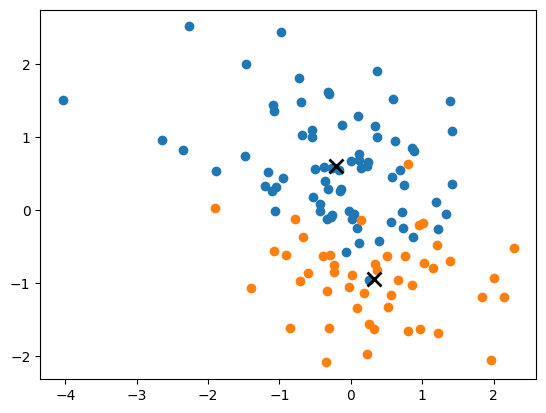

In [32]:
# Representação gráfica de centróides 2D

k = 2

for i in range(k):
    ds = dados.values[np.where(labels==i)]
    plt.plot(ds[:,0],ds[:,1],'o')
    lines = plt.plot(centroids[i,0],centroids[i,1],'kx')
    plt.setp(lines,ms=10.0)    
    plt.setp(lines,mew=2.0)    
    
plt.show()

A representação gráfica em 2D dos centróides dos clusters formados anteriormente facilita a visualização da formação destes 2 grupos, como evidenciado pela figura, na qual se destacam de modo claro os 2 clusters formados. Isto significa que os dados analisados permitem, pelo meio da técnica de clustering, deduzir que há uma relação entre a expressão genética induzida e a resposta biológica exercida.

## Conclusões

As técnicas de redução de dimensionalidade e de clustering de dados elaboradas ao longo desta secção foram repetidas quando se realizou a filtração de dados por variância com valores crescentes de threshold considerados, nomeadamente, 1%, 10% e 50%. Isto permitiu-nos averiguar qual o valor mais indicado, atendendo ao risco de perdas exageradas de dados e, também, o impacto deste valor nos resultados obtidos pelos algoritmos. Deste modo, conluiu-se que a opção ideal seria um threshold de 10%, cujos resultados foram apresentados acima, dado que um threshold de 1% não demonstra ser suficiente para remover variáveis de variabilidade mínima e pouca relevânica para a análise, implicando uma maior dimensão de dados a analisar, e um threshold de 50% elimina demasiadas variáveis, de tal forma a prejudicar os algoritmos aplicados de seguida, devido à perda de informação importante.

No que diz respeito aos modelos de aprendizagem não-supervisionada aqui aplicados, estes não mostraram ser os mais indicados para a previsão de resposta ao tratamento baseada na expressão genética, visto que os resultados observados não apresentam a precisão desejada e são de interpretação variável. Posto isto, considera-se prudente o desenvolvimento e aplicação de modelos de aprendizagem máquina supervisionados, com o intuito de uma melhor previsão de resposta. O seguimento deste trabalho encontra-se na Secção 3.